# Learning outcome
 - Geometric transformation
      - rotation
      - translation
      - affine transformation
      - perspective transformation
      
 - Basic drawing functions
      - line
      - circle
      - ellipse
      - rectangle
      - text
      
 - Bitwise operation
      - OR
      - XOR
      - AND
      - NOT
      
 - Convolution: sliding windows performing linear combination.
      - Image smoothing (denoising)
      - Sharpening
      - at the heart of CNN
      - other effects

## Setup

In [56]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

### Translation

In [6]:
img = cv.imread("lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w + tx, h + ty))

show_img(f"Translation tx: {tx}, ty: {ty}", dst )

### Rotation

In [11]:
# define M: center, angle and scale
yc, xc = h // 2, w // 2

# 90 degree is same as -270
angle = 45 # +ve: anti-clockwise ; -ve: clockwise

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("Rotation", dst)

### Custom affine transform

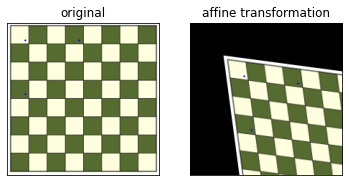

In [8]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transformation")
plt.show()

In [9]:
dst[75, 75, :]

array([  0,   0, 255], dtype=uint8)

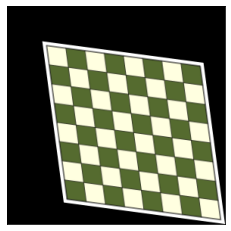

In [12]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))
plt_img(dst_new)

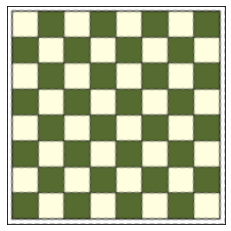

In [17]:
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst_new, M_inv, (w, h))
plt_img(img_restored)

### Perspective transform

In [47]:
img = cv.imread("images/name_card_sample.webp")
img_copy = img.copy()

show_img("Name card", img, adjust=True)

In [50]:
# get the 4 points
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(118, 101)
(771, 46)
(911, 271)
(75, 384)


In [47]:
!pip install scipy

                                              0.0/44.1 MB ? eta -:--:--
                                              0.1/44.1 MB 2.3 MB/s eta 0:00:20
                                              0.5/44.1 MB 6.3 MB/s eta 0:00:07
                                              0.8/44.1 MB 6.6 MB/s eta 0:00:07
     -                                        1.4/44.1 MB 8.1 MB/s eta 0:00:06
     -                                        1.4/44.1 MB 8.1 MB/s eta 0:00:06
     -                                        1.4/44.1 MB 8.1 MB/s eta 0:00:06
     --                                       2.2/44.1 MB 7.0 MB/s eta 0:00:06
     --                                       2.3/44.1 MB 6.2 MB/s eta 0:00:07
     --                                       2.9/44.1 MB 6.7 MB/s eta 0:00:07
     --                                       3.1/44.1 MB 6.4 MB/s eta 0:00:07
     --                                       3.2/44.1 MB 5.9 MB/s eta 0:00:07
     ---                                      3.3/44.1 MB 5


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from scipy.spatial.distance import euclidean

In [51]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

### Exercise on dice.jfif

In [77]:
img = cv.imread("images/dice.jfif")
img_copy = img.copy()

show_img("Dice", img, adjust=True)

In [75]:
# get the 4 points
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(49, 249)
(870, 11)
(1171, 417)
(390, 645)


In [76]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

### Drawing functions

In [87]:
#line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [80]:
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [81]:
#circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0, 0, 255), 2, cv.LINE_AA)
show_img("Circle", img_copy)

In [90]:
# ellipse
img_copy = img.copy()
axes = (25 ,50)
angle = 0

cv.ellipse(img_copy, (145, 50), axes,
           angle, 0, 360, (100, 0, 100), 2, cv.LINE_AA)

show_img("Ellipse", img_copy)

In [88]:
#rectangle
img_copy = img.copy()

cv.rectangle(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

In [92]:
# text
img_copy = img.copy()

cv.putText(img_copy, "I'm a happy dog", (15, 145), cv.FONT_HERSHEY_COMPLEX,
           0.65, (200, 0, 50), 2)
show_img("Text", img_copy)

### Create a custom drawing board:
Trackbar function, mouse callback function.

In [97]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 255, 0)  #BGR not RGB
CYAN = (255, 0, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN , BLUE, CYAN, MAGENTA, YELLOW, WHITE)

# create a trackbar function, mouse callback function, while loop to show
# the templates

def nothing(x):
    pass

p0 = p1 = (0, 0)

def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tb1_name, wn)
        if d==0:
            d=-1
        i = cv.getTrackbarPos(tb2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
        
wn = "window"
tb1_name = "thickness"
tb2_name = "color"

img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tb1_name, wn, 0, 10, nothing)
cv.createTrackbar(tb2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while(True):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
    if k==ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

### Exercise: drawing bulleye

In [120]:
img = np.zeros((400,400, 3), dtype = np.uint8)
img_copy = img.copy()

h, w = img.shape[:2]
yc, xc = h // 2, w // 2

#radius = np.arange(20, 200, 15)
#for r in radius:


for i in range(1, 11):
    cv.circle(img_copy, (xc, yc), 18 * i, (255, 255, 255), 2)
    
cv.putText(img_copy, "Bulleye", (10, h - 10), cv.FONT_HERSHEY_COMPLEX,
           0.65, (255, 255, 255), 1)
    
show_img("Bulleye", img_copy)

## Bitwise operations

255 (white) = True

0 (black) = False

255 AND 0 = 0 

0 AND 255 = 0

255 OR 0 = 255

In [124]:
rect = np.zeros((400,400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400,400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [126]:
# AND
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [127]:
# OR
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [130]:
# XOR
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [131]:
# NOT
res_NOT = cv.bitwise_not(rect, circle)
show_img("NOT", res_NOT)

In [137]:
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv.bitwise_and(img, img, mask=mask)

show_img("Result", res)

In [2]:
# identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3, 3))
kernel[1, 1] = 1
#print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

In [54]:
# sharpening kernel
kernel = np.array([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpened", dst)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filter.dispatch.cpp:1530: error: (-215:Assertion failed) !_src.empty() in function 'cv::filter2D'


In [53]:
# blur
kernel = np.ones((5, 5)) / 25

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp", dst)

## Weekly activity

4 functions to perform image blurring
- `cv.blur`: mean average filter
- `cv.GaussianBlur`: Gaussian filter
- `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise
- `cv.bilateralFilter`: edge-preserving filter

### Exercise 1

In [31]:
# external library: imutils
import imutils

img = cv.imread("lena.jfif")

rotate_img = imutils.rotate_bound(img, 45)
show_img("Rotation", rotate_img)

# Transformation matrix
h, w = img.shape[:2]
yc, xc = h // 2, w // 2

# 90 degree is same as -270
angle = 45 # +ve: anti-clockwise ; -ve: clockwise

M = cv.getRotationMatrix2D((xc, yc), angle, 1)

abs_cos = abs(M[0,0])
abs_sin = abs(M[0,1])

bound_w = int(h * abs_sin + w * abs_cos)
bound_h = int(h * abs_cos + w * abs_sin)

M[0, 2] += bound_w/2 - xc
M[1, 2] += bound_h/2 - yc
    
    
dst = cv.warpAffine(img, M, (bound_w, bound_h))

show_img("Rotation", dst)

### Exercise 2

In [45]:
img1 = cv.imread("flower.jfif")
img2 = cv.imread("native-bee.png")

row,col,channel = img1.shape
roi = img2[0:row, 0:col]

img1gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img1gray, 80, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

img2_bg = cv.bitwise_and(roi, roi, mask = mask_inv)
img1_fg = cv.bitwise_and(img1, img1, mask = mask)

dst = cv.add(img2_bg, img1_fg)
img2[0:row, 0:col] = dst

show_img("res", img2)

### Exercise 3

In [52]:
img = cv.imread("native-bee.png")

kernel_33 = np.array([[0, -1, 0], [-1,5,-1], [0, -1, 0]])
kernel_55 = np.array([[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1],[-1,-1,25,-1,-1]
                     ,[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]])

#sharpening with custom 3x3 kernel
res1 = cv.filter2D(img, -1, kernel_33)
res2 = cv.filter2D(img, -1, kernel_55)

show_img("3x3", res1)
show_img("5x5", res2)

# Comment on 3x3 kernel & 5x5 kernel
#
# 3x3 kernel: Image is sharpened nicely, blurred details in the 
#             original image stood out clearer in the processed image.
#
# 5x5 kernel: Image is "over-sharpened", many noises are introduced in the
#             processed image, making it looking too sharp, too noisy, and
#             over-saturated.

### Exercise 4

In [64]:
img = cv.imread("noise_lena.jpg")
import numpy as np
from matplotlib import pyplot as plt

# Average filter
average = cv.blur(img, (5,5))
show_img("Average", average)

# Gaussian kernel
gaussian = cv.GaussianBlur(img, (5,5), 0)
show_img("Gaussian", gaussian)

# Median kernel
median = cv.medianBlur(img, 5)
show_img("Median", median)

# Comment
# Mean average = the noise is slightly blurred but still visible
# Gaussian = The noise is still prominent, worse than mean & median filter
# Median = Removed noise the best among all techniques used
# Type of noise = "salt and pepper"